In [2]:
import numpy as np
import pandas as pd

In [3]:
# colab
# file_path = '/content/drive/MyDrive/kaggle-study/3/Auction_master_kr/'

# jupyter
file_path = './Auction_master_kr/'

train = pd.read_csv(file_path + 'Auction_master_train.csv')
test = pd.read_csv(file_path + 'Auction_master_test.csv')
submission = pd.read_csv(file_path + 'Auction_submission.csv')
rent = pd.read_csv(file_path + 'Auction_rent.csv')
regist = pd.read_csv(file_path + 'Auction_regist.csv')
result = pd.read_csv(file_path + 'Auction_result.csv')

In [4]:
train.shape

(1933, 41)

In [5]:
test.shape

(829, 41)

In [6]:
submission.shape

(829, 2)

In [7]:
result.shape

(8528, 6)

In [8]:
regist.shape

(20702, 7)

In [9]:
train.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [10]:
result.head()

,Auction_key,Auction_seq,Auction_date,Appraisal_price,Minimum_sales_price,Auction_results
0,1,1,2011-06-21 00:00:00,313000000,313000000,변경
1,1,2,2011-12-13 00:00:00,313000000,313000000,변경
2,1,3,2016-05-17 00:00:00,298000000,298000000,유찰
3,1,4,2016-06-21 00:00:00,298000000,238400000,유찰
4,1,5,2016-07-26 00:00:00,298000000,190720000,유찰


In [11]:
regist.head()

,Auction_key,Auction_seq,Regist_type,Regist_class,Regist_date,Creditor,Regist_price
0,1,10001,집합건물등기,소유이전,20050715,Private,0
1,1,10002,집합건물등기,가압,20050914,푸른이상호저축은행,860547945
2,1,10003,집합건물등기,가압,20051229,Private,189800000
3,1,10004,집합건물등기,가압,20060428,Private,1346000000
4,1,10005,집합건물등기,가처분,20070410,Private,0


## train 데이터 확인


**회귀 -> 타겟값 정규분포로 하는 것 생각!**


In [12]:
train['Auction_class'].value_counts()

임의    1439
강제     494
Name: Auction_class, dtype: int64

In [13]:
train['Appraisal_company'].value_counts()

부경감정     33
자연감정     33
서초감정     31
대일감정     30
한마음감정    30
         ..
세라감정      1
두요감정      1
대건감정      1
신화감정      1
서울감정      1
Name: Appraisal_company, Length: 238, dtype: int64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Auction_key                  1933 non-null   int64  
 1   Auction_class                1933 non-null   object 
 2   Bid_class                    1933 non-null   object 
 3   Claim_price                  1933 non-null   int64  
 4   Appraisal_company            1933 non-null   object 
 5   Appraisal_date               1933 non-null   object 
 6   Auction_count                1933 non-null   int64  
 7   Auction_miscarriage_count    1933 non-null   int64  
 8   Total_land_gross_area        1933 non-null   float64
 9   Total_land_real_area         1933 non-null   float64
 10  Total_land_auction_area      1933 non-null   float64
 11  Total_building_area          1933 non-null   float64
 12  Total_building_auction_area  1933 non-null   float64
 13  Total_appraisal_pr

###

In [15]:
train['Hammer_price']

0        760000000
1        971889999
2         93399999
3        256899000
4        158660000
           ...    
1928     402500000
1929     430234600
1930    1118999990
1931     403000000
1932     686010000
Name: Hammer_price, Length: 1933, dtype: int64

In [16]:
train_processed = train.copy()

In [17]:
train_processed['Hammer_price'] = np.log1p(train['Hammer_price'])

In [18]:
train_processed['Hammer_price']

0       20.448829
1       20.694753
2       18.352402
3       19.364194
4       18.882274
          ...    
1928    19.813206
1929    19.879841
1930    20.835701
1931    19.814447
1932    20.346403
Name: Hammer_price, Length: 1933, dtype: float64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\yrc92\.conda\envs\ai_study_py37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hammer_price', ylabel='Density'>

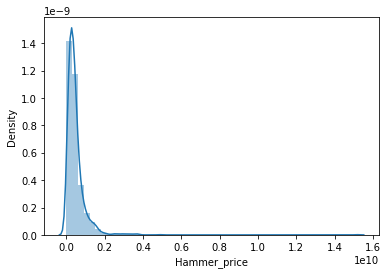

In [20]:
sns.distplot(train['Hammer_price'])

C:\Users\yrc92\.conda\envs\ai_study_py37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hammer_price', ylabel='Density'>

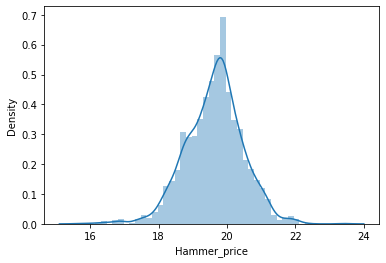

In [21]:
sns.distplot(train_processed['Hammer_price'])

### try 1

일단 따로 생각해야될 것 같은 피처의 데이터들은 drop하고 나머지 데이터 전처리 후 결과보자.

#### feature engineering 가능해보이는 피처
- `Total_floor`-`Current_floor` : 나누기를 통해? -> 보통 윗 층이 더 비싸지 않나? 그렇다고 이 피처들 지워도되려나
- `First_auction_date`-`Final_auction_date` : 

In [22]:
train['Apartment_usage'].value_counts()

아파트     1656
주상복합     277
Name: Apartment_usage, dtype: int64

In [24]:
train['Preserve_regist_date'].value_counts()1

1111-11-11 00:00:00    43
1971-03-31 00:00:00    27
2012-02-10 00:00:00    12
2011-08-05 00:00:00     9
2008-01-10 00:00:00     7
                       ..
1992-12-17 00:00:00     1
2004-06-07 00:00:00     1
1993-12-10 00:00:00     1
1996-07-18 00:00:00     1
2006-11-30 00:00:00     1
Name: Preserve_regist_date, Length: 1256, dtype: int64

In [25]:
train['Close_date'].value_counts()

2016-09-08 00:00:00    37
2017-03-29 00:00:00    20
2017-06-29 00:00:00    19
2018-02-28 00:00:00    19
2017-12-28 00:00:00    17
                       ..
2017-09-15 00:00:00     1
2016-06-24 00:00:00     1
2017-06-02 00:00:00     1
2017-08-28 00:00:00     1
2017-11-10 00:00:00     1
Name: Close_date, Length: 389, dtype: int64

In [26]:
train['Close_result'].value_counts()

배당      1921
          12
Name: Close_result, dtype: int64

In [36]:
drop_cols = [
    'Auction_key', 'Appraisal_company', 'Appraisal_date', 'Final_result', 'Creditor',
    'addr_do', 'addr_si', 'addr_dong', 'addr_li', 'addr_san', 'addr_bunji1',
    'addr_bunji2', 'addr_etc', 'Specific', 'road_name', 'road_bunji1', 'road_bunji2',
    'Close_date', 'Close_result']
ordinal_cols = ['Auction_class', 'Apartment_usage', 'Share_auction_YorN']
onehot_cols = ['Bid_class']
datetime_cols = ['First_auction_date', 'Final_auction_date', 'Preserve_regist_date']

In [29]:
train_processed.drop(drop_cols, inplace=True, axis=1)

In [30]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Auction_class                1933 non-null   object 
 1   Bid_class                    1933 non-null   object 
 2   Claim_price                  1933 non-null   int64  
 3   Auction_count                1933 non-null   int64  
 4   Auction_miscarriage_count    1933 non-null   int64  
 5   Total_land_gross_area        1933 non-null   float64
 6   Total_land_real_area         1933 non-null   float64
 7   Total_land_auction_area      1933 non-null   float64
 8   Total_building_area          1933 non-null   float64
 9   Total_building_auction_area  1933 non-null   float64
 10  Total_appraisal_price        1933 non-null   int64  
 11  Minimum_sales_price          1933 non-null   int64  
 12  First_auction_date           1933 non-null   object 
 13  Final_auction_date

In [43]:
train['Preserve_regist_date'].sort_values()

491     1111-11-11 00:00:00
626     1111-11-11 00:00:00
1266    1111-11-11 00:00:00
637     1111-11-11 00:00:00
1747    1111-11-11 00:00:00
               ...         
1863    2016-05-20 00:00:00
240     2016-08-24 00:00:00
1281    2017-03-06 00:00:00
1096    2017-03-10 00:00:00
1864    2017-06-12 00:00:00
Name: Preserve_regist_date, Length: 1933, dtype: object

In [47]:
train[train['Close_result'] != '배당']

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
962,14,임의,일반,1138371040,리파인감정,2014-04-14 00:00:00,2,1,15487.3,78.55,...,NaN,N,개포로109길,69.0,NaN,1111-11-11 00:00:00,,37.496297,127.076623,1207210000
1016,1,강제,개별,900000000,신명감정,2016-03-15 00:00:00,5,4,510.0,35.11,...,NaN,Y,0,NaN,NaN,1111-11-11 00:00:00,,37.508474,126.952834,172000000
1026,843,강제,일반,117409245,도시감정,2016-06-10 00:00:00,1,0,30235.4,47.17,...,NaN,N,독막로,145.0,NaN,1111-11-11 00:00:00,,37.548457,126.929413,725550000
1040,264,임의,일반,94459726,지녕감정,2016-11-04 00:00:00,1,0,259.1,20.42,...,NaN,N,선릉로137길,6.0,NaN,1111-11-11 00:00:00,,37.519267,127.039941,330000100
1146,1215,임의,일반,80000000,현산감정,2017-02-09 00:00:00,2,1,1145.0,56.86,...,NaN,N,부일로1길,136.0,9.0,1111-11-11 00:00:00,,37.495211,126.815756,265970000
1407,1738,임의,일반,70000000,화신감정,2017-09-25 00:00:00,2,1,82595.1,57.37,...,NaN,N,신내로21길,16.0,NaN,1111-11-11 00:00:00,,37.616051,127.088214,538897000
1438,627,임의,일반,138000000,온누리감정,2017-06-21 00:00:00,2,1,1391.5,52.23,...,NaN,N,양재대로95길,60.0,NaN,1111-11-11 00:00:00,,37.531094,127.133775,445000000
1627,1202,강제,일반,238616280,성민감정,2016-11-17 00:00:00,2,1,893.0,47.22,...,NaN,N,목동동로12길,38.0,NaN,1111-11-11 00:00:00,,37.522362,126.875448,556280000
1640,1683,강제,일반,64100475,기린감정,2017-04-28 00:00:00,2,1,25472.5,26.07,...,NaN,N,신내로,51.0,NaN,1111-11-11 00:00:00,,37.604908,127.094707,331299000
1665,1667,임의,일반,181697863,프라임감정,2017-03-28 00:00:00,2,1,531.3,44.27,...,NaN,N,용마산로114길,37.0,NaN,1111-11-11 00:00:00,,37.599278,127.103362,243100000


#### Preserve_regist_date

`1111-11-11 00:00:00`인 값이 있다. 값을 처리할 수 없는 것에 이렇게 되어있는 듯? -> 아직 한번도 등기된 적 없는 집?

## Preserve_regist_date

`1111-11-11 00:00:00`인 값이 있다. 값을 처리할 수 없는 것에 이렇게 되어있는 듯? -> 아직 한번도 등기된 적 없는 집?

위와 같이 생각한 이유는 `Close_result`가 배당이 아닌 데이터의 `Close_date` 가 `1111-11-11 00:00:00` 인 것을 확인했고 그렇다면 date가 없는 값이 이렇게 최리 되는것이 아닌가... 라고 생각

In [50]:
train[train['Preserve_regist_date'] == '1111-11-11 00:00:00'][['Close_result', 'Preserve_regist_date']]

,Close_result,Preserve_regist_date
29,배당,1111-11-11 00:00:00
32,배당,1111-11-11 00:00:00
81,배당,1111-11-11 00:00:00
84,배당,1111-11-11 00:00:00
118,배당,1111-11-11 00:00:00
122,배당,1111-11-11 00:00:00
224,배당,1111-11-11 00:00:00
227,배당,1111-11-11 00:00:00
239,배당,1111-11-11 00:00:00
294,배당,1111-11-11 00:00:00
